# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 11: *Projection*
Compute a projection from seven corresponding image and 3D points and perform the 
projection on the image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadRGB, imageReadL, plotImageRGB, createImageRGB
from GeometricUtilities import solveSystem, projectionPoints, fillImage
from PrintUtilities import printText

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    maskName = Mask image name

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter11/Input/")
imageName = "cube1.png"
maskName = "mask1.png"

### Show input image

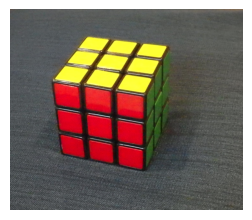

In [3]:
inputImage, width, height = imageReadRGB(pathToDir + imageName)
maskImage, width, height = imageReadL(pathToDir + maskName)

plotImageRGB(inputImage, figureSize = 3)

### Find transformation

In [4]:
centreX, centreY = width/2, height/2

# Corresponding points in the cube image
pts = [[131-centreX,378-centreY],[110-centreX,188-centreY],
       [200-centreX,73-centreY],[412-centreX,100-centreY],
       [410-centreX,285-centreY],[349-centreX,418-centreY],
       [345-centreX,220-centreY]]

q = [[0,0,1],[0,1,1], [0,1,0],[1,1,0], [1,0,0],[1,0,1], [1,1,1]]

# Fill matrix
M = [ ]    
for row in range(0,6):
    r1 = [ q[row][0],q[row][1], q[row][2],1,0,0,0,0,-pts[row][0]*q[row][0],  \
          -pts[row][0]*q[row][1],-pts[row][0]*q[row][2],-pts[row][0] ]
    r2 = [ 0,0,0,0,q[row][0],q[row][1], q[row][2],1,-pts[row][1]*q[row][0],  \
          -pts[row][1]*q[row][1],-pts[row][1]*q[row][2], -pts[row][1] ]
    M.append(r1)
    M.append(r2)
printText(M)

# Solves the equation A*x=b
r = [0,0,0,0,0,0,0,0,0,0,0,1]
p = solveSystem(M, r)
P = [[p[0], p[1], p[2], p[3]],    \
     [p[4], p[5], p[6], p[7]],    \
     [p[8], p[9], p[10], p[11]] ]
printText(P)

[[0, 0, 1, 1, 0, 0, 0, 0, 0.0, 0.0, 171.5, 171.5], [0, 0, 0, 0, 0, 0, 1, 1, -0.0, -0.0, -117.0, -117.0], [0, 1, 1, 1, 0, 0, 0, 0, 0.0, 192.5, 192.5, 192.5], [0, 0, 0, 0, 0, 1, 1, 1, 0.0, 73.0, 73.0, 73.0], [0, 1, 0, 1, 0, 0, 0, 0, 0.0, 102.5, 0.0, 102.5], [0, 0, 0, 0, 0, 1, 0, 1, 0.0, 188.0, 0.0, 188.0], [1, 1, 0, 1, 0, 0, 0, 0, -109.5, -109.5, -0.0, -109.5], [0, 0, 0, 0, 1, 1, 0, 1, 161.0, 161.0, 0.0, 161.0], [1, 0, 0, 1, 0, 0, 0, 0, -107.5, -0.0, -0.0, -107.5], [0, 0, 0, 0, 1, 0, 0, 1, -24.0, -0.0, -0.0, -24.0], [1, 0, 1, 1, 0, 0, 0, 0, -46.5, -0.0, -46.5, -46.5], [0, 0, 0, 0, 1, 0, 1, 1, -157.0, -0.0, -157.0, -157.0]]
[[30.834650223109698, -0.8964961817449293, -10.107629003047716, -14.458773500833217], [5.404174568698675, -26.415646828619934, 18.507751429701994, -1.7481648818648563], [-0.008443303248720151, -0.010969531101805903, -0.01753271073143576, 0.16077704020012926]]


### Projection

In [5]:
# Output image
tImage = createImageRGB(width, height)

# Project world points in the plane (origin, v1, v2) into the image
npts = 100
origin, v1, v2 = [0,0,1], [1,0,0], [0,1,0] # 3D plane, origin and two axis
xy = [ ] # Result points in the image
for a in range(0, npts):
    rowxy = [ ]
    for b in range(0, npts):
        
        # Points along each axis
        v1D = [a*v1[0]/float(npts-1), a*v1[1]/float(npts-1), a*v1[2]/float(npts-1)]
        v2D = [b*v2[0]/float(npts-1), b*v2[1]/float(npts-1), b*v2[2]/float(npts-1)]
        
        # Point in the 3D plane
        s = [origin[0]+v1D[0]+v2D[0], origin[1]+v1D[1]+v2D[1], origin[2]+v1D[2]+v2D[2]]
    
        # Transformation by the projection
        sx = p[0]*s[0] + p[1]*s[1] + p[2]*s[2]  + p[3]
        sy = p[4]*s[0] + p[5]*s[1] + p[6]*s[2]  + p[7]
        sz = p[8]*s[0] + p[9]*s[1] + p[10]*s[2] + p[11] 
        
        # Image coordinates
        rowxy.append([int(sx/sz) + centreX, int(sy/sz) + centreY]) 
    
    xy.append(rowxy)

# Fill the points as red
fillImage([255,0,0], xy, tImage)

# Yellow face. Project points as before and fill in image
xy = projectionPoints([0,1,0],[1,0,0], [0,0,1], npts, p, centreX, centreY)
fillImage([255,255,0], xy, tImage)

# Green face
xy = projectionPoints([1,0,0],[0,1,0], [0,0,1], npts, p, centreX, centreY)
fillImage([0,128,0], xy, tImage)

### Show projection image

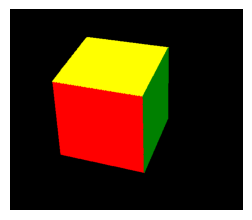

In [7]:
plotImageRGB(tImage, figureSize = 3)  